### Importing Libraries

We import essential libraries for data manipulation (`pandas`), visualization (`matplotlib` and `seaborn`), and statistical testing (`scipy.stats`). The Seaborn style is set for cleaner plot


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

sns.set(style='whitegrid')


### Loading and Combining Data

We load the cleaned solar datasets for Benin, Sierra Leone, and Togo, add a 'country' identifier column to each, and then combine them into a single dataframe for cross-country analysis.


In [17]:
# Load cleaned CSVs (update paths if needed)
df_benin = pd.read_csv('data/benin_clean.csv')
df_sierra = pd.read_csv('data/sierra_leone_cleaned.csv')
df_togo = pd.read_csv('data/togo_dapaong_cleaned.csv')

# Add country column to each dataframe
df_benin['country'] = 'Benin'
df_sierra['country'] = 'Sierra Leone'
df_togo['country'] = 'Togo'

# Combine datasets
df_all = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)


### Summary Statistics

Calculate mean, median, and standard deviation for GHI, DNI, and DHI by country to compare solar radiation metrics across the three countries.


In [11]:
metrics = ['GHI', 'DNI', 'DHI']  # Replace with exact column names if different

summary_stats = df_all.groupby('country')[metrics].agg(['mean', 'median', 'std']).round(2)
print(summary_stats)


                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
country                                                                     
Benin         508.39  510.6  304.16  358.81  359.3  280.16  241.52  225.2   
Sierra Leone  221.31   21.0  302.57  126.15    0.2  224.67  125.98   20.4   
Togo          231.96    3.3  323.00  152.18    0.0  251.44  117.15    3.8   

                      
                 std  
country               
Benin         136.28  
Sierra Leone  159.49  
Togo          156.73  


### Boxplots by Country

Visualize the distribution of GHI, DNI, and DHI across Benin, Sierra Leone, and Togo using boxplots to compare variability and central tendencies.


<Figure size 1800x500 with 0 Axes>

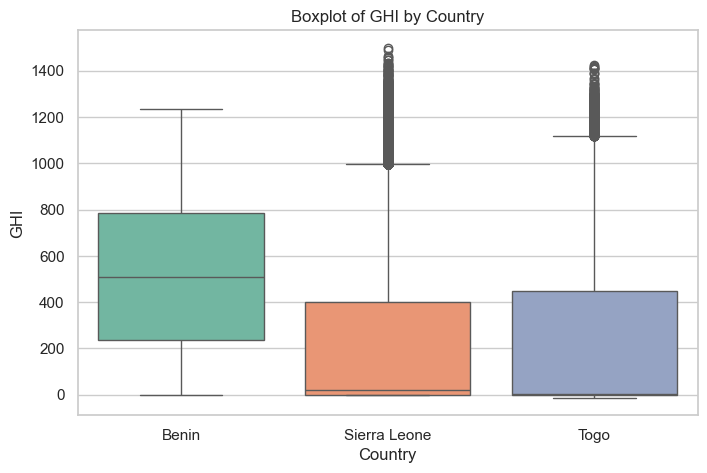

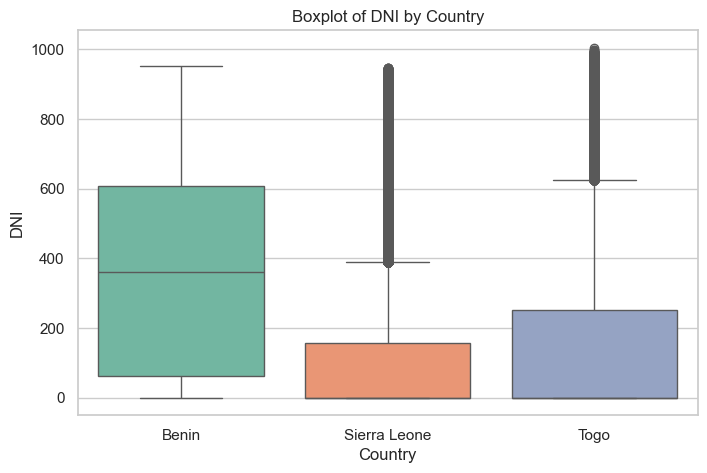

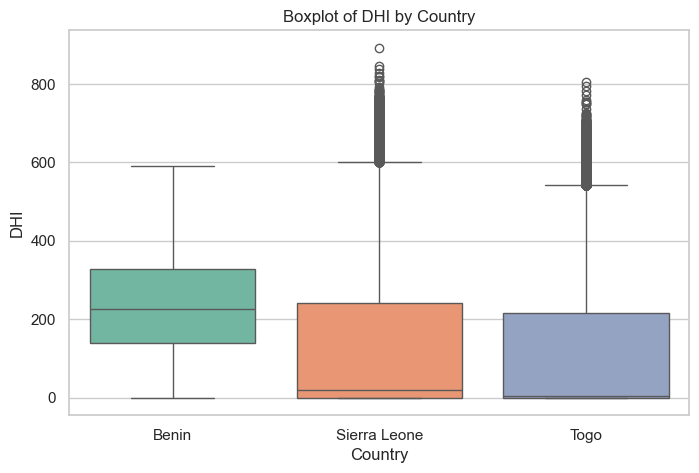

In [ ]:
plt.figure(figsize=(18, 5))
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='country', y=metric, data=df_all, hue='country', palette='Set2', legend=False)
    plt.title(f'Boxplot of {metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.show()


### Summary Statistics by Country

Aggregated mean, median, and standard deviation of GHI, DNI, and DHI metrics for each country to compare central tendencies and variability.


In [21]:
summary = df_all.groupby('country').agg({
    'GHI': ['mean', 'median', 'std'],
    'DNI': ['mean', 'median', 'std'],
    'DHI': ['mean', 'median', 'std']
})

# Flatten MultiIndex columns for easier access
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary = summary.reset_index()


### Average Global Horizontal Irradiance (GHI) by Country

Bar chart showing the average GHI for Benin, Sierra Leone, and Togo, highlighting differences in solar potential.


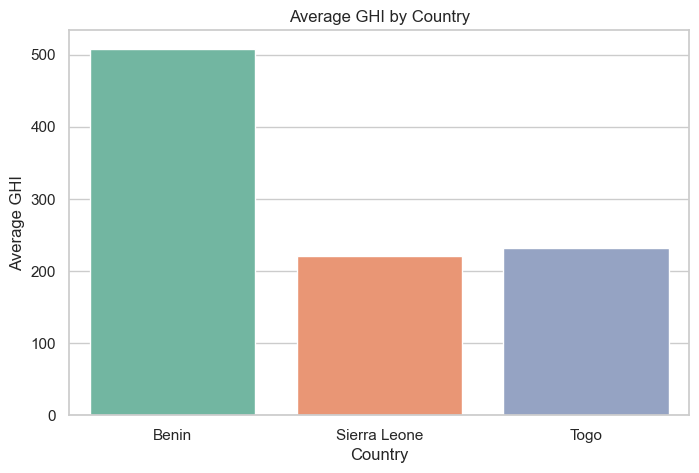

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='country', y='GHI_mean', data=summary, hue='country', palette='Set2', dodge=False, legend=False)
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.legend([],[], frameon=False)  # hides the legend
plt.show()


### One-Way ANOVA Test for GHI

Performed a one-way ANOVA to assess whether mean GHI differs significantly across Benin, Sierra Leone, and Togo.

- **F-statistic:** Indicates the ratio of variance between groups to variance within groups.
- **p-value:** A very small p-value (< 0.05) suggests significant differences in GHI means across countries.


In [14]:
# Extract GHI values by country for testing
ghi_benin = df_all[df_all['country'] == 'Benin']['GHI']
ghi_sierra = df_all[df_all['country'] == 'Sierra Leone']['GHI']
ghi_togo = df_all[df_all['country'] == 'Togo']['GHI']

# Run one-way ANOVA
f_stat, p_val = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

# Alternatively, if data not normally distributed, run Kruskal-Wallis
# stat, p_val = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"One-way ANOVA test on GHI: F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")


One-way ANOVA test on GHI: F-statistic = 79630.934, p-value = 0.0000


### One-Way ANOVA Tests for DNI and DHI

Conducted ANOVA tests for **Direct Normal Irradiance (DNI)** and **Diffuse Horizontal Irradiance (DHI)** across Benin, Sierra Leone, and Togo:

- **DNI ANOVA:** Checks if mean DNI differs across countries.
- **DHI ANOVA:** Checks if mean DHI differs across countries.
- **Interpretation:** Very small p-values (p < 0.05) indicate statistically significant differences in mean DNI and DHI between the countries.


In [15]:
from scipy.stats import f_oneway, kruskal

# Example: ANOVA for DNI
F_dni, p_dni = f_oneway(
    df_all[df_all['country'] == 'Benin']['DNI'],
    df_all[df_all['country'] == 'Sierra Leone']['DNI'],
    df_all[df_all['country'] == 'Togo']['DNI']
)

# Similarly for DHI
F_dhi, p_dhi = f_oneway(
    df_all[df_all['country'] == 'Benin']['DHI'],
    df_all[df_all['country'] == 'Sierra Leone']['DHI'],
    df_all[df_all['country'] == 'Togo']['DHI']
)

print(f"ANOVA DNI: F={F_dni:.2f}, p={p_dni:.4f}")
print(f"ANOVA DHI: F={F_dhi:.2f}, p={p_dhi:.4f}")


ANOVA DNI: F=77773.09, p=0.0000
ANOVA DHI: F=59548.10, p=0.0000


### Summary Statistics of Solar Irradiance Metrics

The table below compares the **mean**, **median**, and **standard deviation** of GHI, DNI, and DHI across Benin, Sierra Leone, and Togo. This statistical overview helps highlight key differences in solar potential among the three countries.


In [24]:
summary.style.format({
    'GHI_mean': '{:.2f}', 'GHI_median': '{:.2f}', 'GHI_std': '{:.2f}',
    'DNI_mean': '{:.2f}', 'DNI_median': '{:.2f}', 'DNI_std': '{:.2f}',
    'DHI_mean': '{:.2f}', 'DHI_median': '{:.2f}', 'DHI_std': '{:.2f}',
})


,country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,508.39,510.60,304.16,358.81,359.30,280.16,241.52,225.20,136.28
1,Sierra Leone,221.31,21.00,302.57,126.15,0.20,224.67,125.98,20.40,159.49
2,Togo,231.96,3.30,323.00,152.18,0.00,251.44,117.15,3.80,156.73


### Key Observations

- **Benin** consistently exhibits the **highest mean and median values** for GHI, DNI, and DHI — indicating the strongest solar potential.
- **Sierra Leone** shows the **lowest medians** across all metrics and a high variance, suggesting more frequent low-solar conditions.
- Despite Togo’s low median values, its GHI and DHI variability is comparable to Sierra Leone, but with slightly higher means.
